# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash; 80 баллов

---

In [ ]:
# Bot check

# HW_ID: fpmi_ad3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None  # default='warn'
sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

На занятии мы уже <a href="https://miptstats.github.io/courses/ad_fivt/titanik.html" target="_blank">начинали</a> работать с датасетом Титаник. Сейчас ваша задача &mdash; на основе простого анализа предоставленных данных получить некоторое приближенное правило определения, выжил пассажир или нет.

#### 1. Подготовка данных

Загрузите данные с помощью `pandas`.

In [ ]:
data = pd.read_csv('/content/train.csv')

Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [ ]:
data_as_train = data.sample(frac = 0.7)
data_as_test = pd.concat([data,data_as_train]).drop_duplicates(keep=False) #получаем разницу между data и data_as_train

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак. Примените к обеим частям таблицы функцию ниже

In [ ]:
features_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target_column = 'Survived' # Целевой признак

def get_features_and_target(data):
    features = data[features_columns]
    target = data[target_column]
    return features, target

In [ ]:
features_train, target_train = get_features_and_target(data_as_train)
features_test, target_test = get_features_and_target(data_as_test)

#### 2. Исследование

**Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно. 

*Не забывайте про информативность и эстетичность графиков.*

---

1. Построим ящик с усами для возраста пассажира в зависимости от выживаемости. Из графика следует, что возраст - неинформативный признак для нашей задачи.

2. Отдельно для каждого пола построим гистограммы по всем оставшимся признакам features_train отдельно для выживших и погибших. Это позволит нам выбрать 3 признака, по которым лучше всего строить деревья решений: Sex, Pclass и Parch

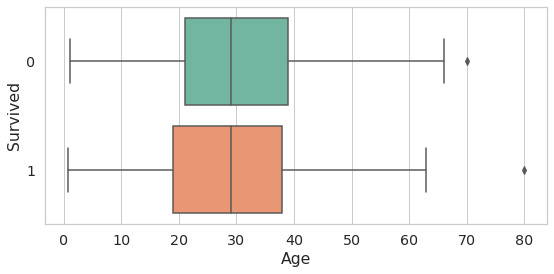

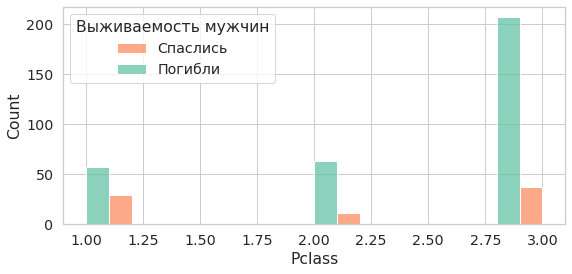

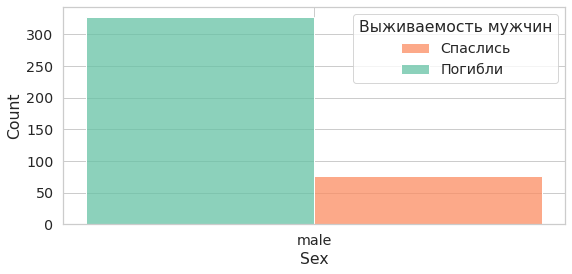

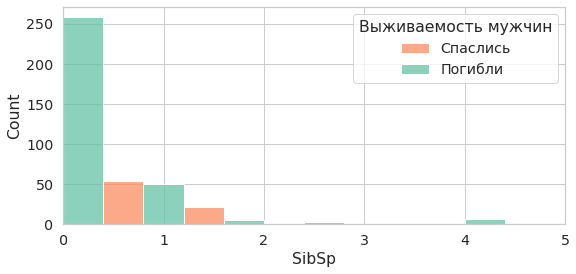

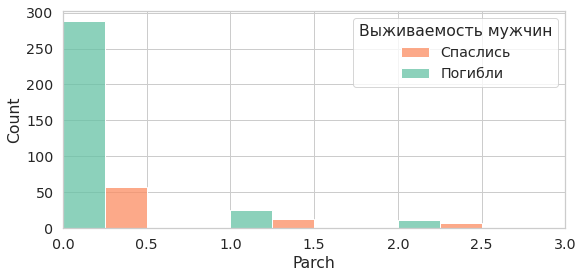

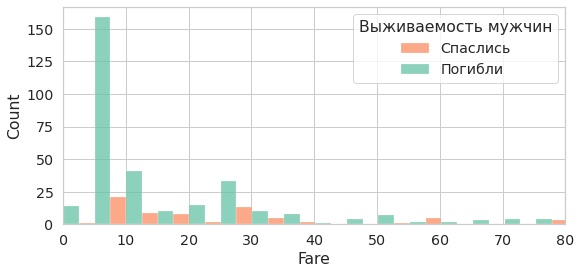

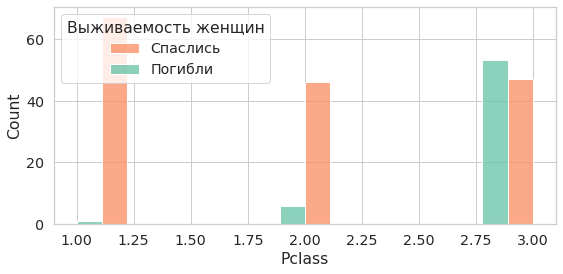

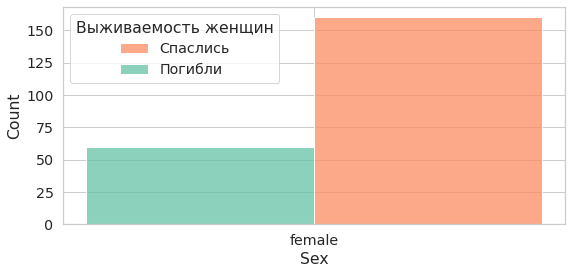

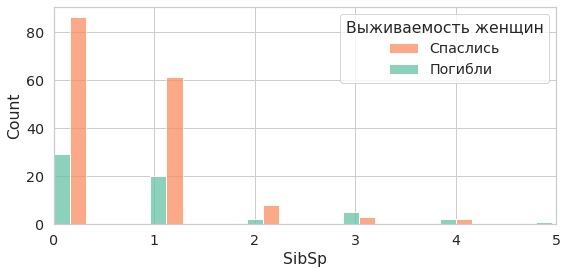

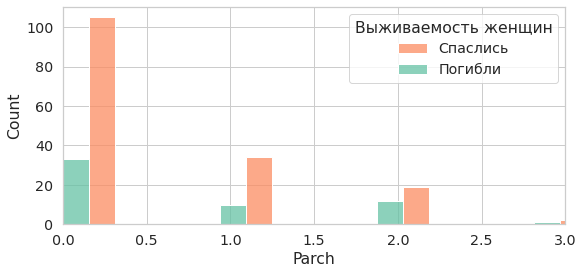

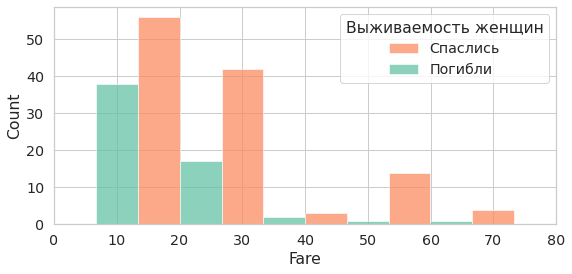

In [ ]:
#Построение ящика с усами
plt.figure(figsize=(9, 4))
sns.boxplot(x = features_train['Age'], y = target_train, orient = 'h')

#Построение гистограмм
for sex in ['male', 'female']:
  for feature in features_columns:

    if feature == 'Age':
      continue
    plt.figure(figsize=(9, 4))
    sns.histplot(x = data_as_train[(data_as_train['Sex'] == sex)][feature], 
                 hue = data_as_train['Survived'], multiple = "dodge")
    
    if sex == 'male':
      plt.legend(title = 'Выживаемость мужчин', labels = ['Спаслись', 'Погибли'])
    else:
      plt.legend(title = 'Выживаемость женщин', labels = ['Спаслись', 'Погибли'])

    if (feature == 'Fare'):
      plt.xlim((0, 80))

    if (feature == 'Parch'):
      plt.xlim((0, 3))

    if (feature == 'SibSp'):
      plt.xlim((0, 5))


#### 3. Классификация

На основе проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики.

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. *Примечание*: дерево из одного листа имеет глубину 0.

**Дерево 1:**

Проверяем *пол пассажира*:

1.   **Мужчина** --> Проверяем количество детей/родителей (*Parch*):

        1.1.   0 --> **погиб**

        1.2.   иначе --> **выжил**

2.   **Женщина** --> Проверяем количество детей/родителей (*Parch*):

        1.1.   0 --> **погибла**

        1.2.   иначе --> **выжила**

**Дерево 2:**

Проверяем *класс пассажира* (*Pclass*):

1.   **III** класс --> **погиб**

1.   **I, II** класс --> **выжил**

Реализуйте полученные деревья по шаблону:


In [ ]:
'''
Предсказание целевого признака для данных features -- pandas-таблица данных.
Возвращает pandas.Series с теми же индексами, что и у features.
'''

def tree1(features):
    predicted = pd.Series(index = features.index)
    #print(predicted.index)
    for feature in features.iterrows():
      #print(feature[0])
      if feature[1]['Sex'] == 'male':
        if feature[1]['Parch'] == 0:
          predicted[feature[0]] = 0
        else:
          predicted[feature[0]] = 1
      else:
        if feature[1]['Parch'] == 0:
          predicted[feature[0]] = 1
        else:
          predicted[feature[0]] = 0
    return (predicted)

def tree2(features):
    predicted = pd.Series(index = features.index)
    for feature in features.iterrows():
      if (feature[1]['Pclass'] == 3):
         predicted[feature[0]] = 0
      else:
         predicted[feature[0]] = 1
    return (predicted)

#### 4. Качество

Вспомним, что у нас имеется тестовая часть выборки. Самое время ее использовать для того, чтобы оценить, насколько хорошими получились деревья. Предложите какой-нибудь критерий качества.

*Замечание*. Не стоит пытаться искать, какие критерии существуют. В данном случае легко предложить адекватный критерий. Стандартные критерии мы разберем позже, но для начала лучше подумать самостоятельно.

**Критерий:**

Посмотрев на распределение выживших и погибших в данных, можно сказать, что стандартная accuracy метрика здесь подойдет: 

$\frac{TruePrediction}{TruePrediction + FalsePrediction}$

Реализуйте данный критерий по шаблону

In [ ]:
def criteria(target, predicted):
    '''
    Вычисление критерия качества для предсказания predicted, 
    если истинные значения -- target.
    Возвращает одно вещественное число.
    '''
    TP = 0
    FP = 0
    for ind in predicted.index:
      if (target[ind] == int(predicted[ind])):
        TP += 1
      else:
        FP += 1
    return TP/(TP + FP)

Посчитайте качество полученных ранее деревьев.

*Примечание.* Полученные значения не влияют на оценку по задание. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [ ]:
print(criteria(target_test, tree1(features_test)))
print(criteria(target_test, tree2(features_test)))

0.6966292134831461
0.6816479400749064


<ipython-input-150-7252cde61c6b>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predicted = pd.Series(index = features.index)
<ipython-input-150-7252cde61c6b>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predicted = pd.Series(index = features.index)


**5. Метод ближайшего соседа**

В домашнем задании 1 вы уже реализовали функцию поиска ближайших соседей. Теперь давайте применим ее для решения нашей текущей задачи. 

Реализуйте функцию, которая для каждого объекта тестового набора данных найдет $k$ ближайших соседей из обучающего набора данных, и в качестве ответа возьмет наиболее часто встречающееся значение целевого признака среди найденных соседей. Обратите внимание, что соседей необходимо искать только среди объектов обучающего набора данных.

In [ ]:
features_train_onehot, target_train_onehot = get_features_and_target(data_as_train)
features_test_onehot, target_test_onehot = get_features_and_target(data_as_test)

#Применим one-hot-encoding к колонке "Sex"
for data in [features_train_onehot, features_test_onehot]:
  data["Male"] = np.nan
  data["Female"] = np.nan

  for ind in data.index:
    if data['Sex'][ind] == 'male':
      data['Male'][ind] = 1
      data['Female'][ind] = 0
    else:
      data['Male'][ind] = 0
      data['Female'][ind] = 1 

features_train_onehot = features_train_onehot.drop('Sex', axis = 1)
features_test_onehot = features_test_onehot.drop('Sex', axis = 1)

#Реализуем функцию KNN
def knn(features, train_features, train_target, k = 1):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    на основе обучающего набора данных train_features, train_target.
    Возвращает pandas.Series с теми же индексами, что и у features.
    Число k -- количество соседей.
    '''
    predicted = pd.Series(index = features.index, dtype = 'float64')
    #Преобразуем к numpy
    features_np = features.to_numpy().copy()
    train_features_np = train_features.to_numpy().copy()
    train_target = train_target.reset_index()

    #Найдем индексы соседей
    points = (np.argsort(np.sqrt(np.sum(np.square(features_np - train_features_np[:, None]),  2)).T, 1))[:,0:k]

    #Определим их класс
    index = 0
    for ind in features.index:
      dead_cnt = 0
      live_cnt = 0
      for counter in points[index]:
        if (train_target['Survived'][counter] == 0):
          dead_cnt += 1
        else:
          live_cnt += 1
      if live_cnt > dead_cnt:
        predicted[ind] = 1
      else:
        predicted[ind] = 0
      index += 1
    return predicted

kn = knn(features_test_onehot, features_train_onehot, target_train_onehot, 1)

Посчитайте значение предложенного ранее критерия качества для метода ближайшего соседа для значений $k$ от 1 до 10. Постройте график зависимости критерия качества от $k$. Как вы можете пояснить полученные результаты?


> **Вывод по KNN**:
> Максимальное значение достигается при k = 10. Далее качество падает, из чего можно предположить, что данные разделены на четкие большие группы и взгляд на соседей дает хорошие результаты. Если отнормировать данные, отсеять некоторые признаки, то качество может стать приемлимым.Также значение сильно зависит здесь от разбиения данных



1 0.599250936329588
2 0.5880149812734082
3 0.599250936329588
4 0.6142322097378277
5 0.6179775280898876
6 0.6067415730337079
7 0.6067415730337079
8 0.6179775280898876
9 0.6217228464419475
10 0.7078651685393258


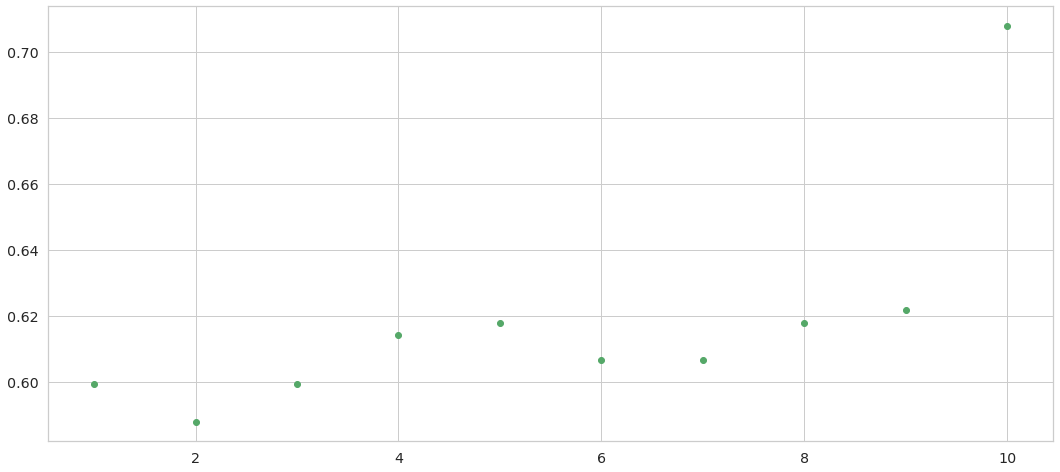

In [ ]:
index = []
pred = []
for i in range (1, 11):
  knn_predicted = knn(features_test_onehot, features_train_onehot, target_train_onehot, i)
  print(i, criteria(target_test, knn_predicted))
  index.append(i)
  pred.append(criteria(target_test, knn_predicted))
plt.figure(figsize = (18, 8))
plt.plot(index, pred, 'go')

#### 6. Выводы

*МОДЕЛИ*:
> Из полученных результатов можно понять, что данные весьма хорошо поддаются предсказанию, т.к. отстроенные "на глаз" модели показывают неплохие значения. Деревья с большей глубиной могут показать высокий score, как и отнормированный KNN. Если грамотно обучить деревья, то результат можно добить до 90%. 

*ДАННЫЕ*:
> Анализируя информацию, очевидно: в основном выжили женщины и дети, особенно те, у кого было много родственников. Большая часть 3 класса погибла. Этот результат проходит проверку на "здравый смысл" и исторические данные.


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2

<a target="_blank" href="yelp.com">Yelp</a> — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

![Yelp_Logo_No_Outline_Color.jpg](attachment:Yelp_Logo_No_Outline_Color.jpg)

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате `json` можно посмотреть по <a target="_blank" href="https://www.kaggle.com/yelp-dataset/yelp-dataset/data">ссылке</a>.

_____________

**Что нужно сделать:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. <a target="_blank" href="https://yandex.ru/company/researches/2017/msk_mobile_map">Пример</a> с несколько другой задачей.
* А также найти рестораны с наилучшими отзывами.

------

#### Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [ ]:
import folium

LV_loc = [36.175, -115.137]

data_business = pd.read_csv('yelp_business.csv')
data_business.head(5)

,Unnamed: 0,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories
0,0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,1,Dentists;General Dentistry;Health & Medical;Or...
1,1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1,Departments of Motor Vehicles;Public Services ...
3,3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,0,Sporting Goods;Shopping
4,4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. В таблице должен быть указан город (название) и количество компаний в этом городе.

*Подсказка.* Для выполнения стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`.

In [ ]:
data_business.groupby(['city']).count().sort_values(by = 'business_id', ascending=False).head(5)

,Unnamed: 0,business_id,name,neighborhood,address,state,postal_code,latitude,longitude,is_open,categories
city,,,,,,,,,,,
Las Vegas,26775,26775,26775,21887,26775,26775,26655,26775,26775,26775,26775
Phoenix,17213,17213,17213,0,17213,17213,17121,17213,17213,17213,17213
Toronto,17206,17206,17206,14064,17206,17206,17102,17205,17205,17206,17206
Charlotte,8553,8553,8553,5844,8553,8553,8517,8553,8553,8553,8553
Scottsdale,8228,8228,8228,0,8228,8228,8201,8228,8228,8228,8228


Пусть `N` &mdash; город с наибольшим количеством компаний. Оставьте в таблице только записи, соответствующие городу `N`. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ &mdash; широту.

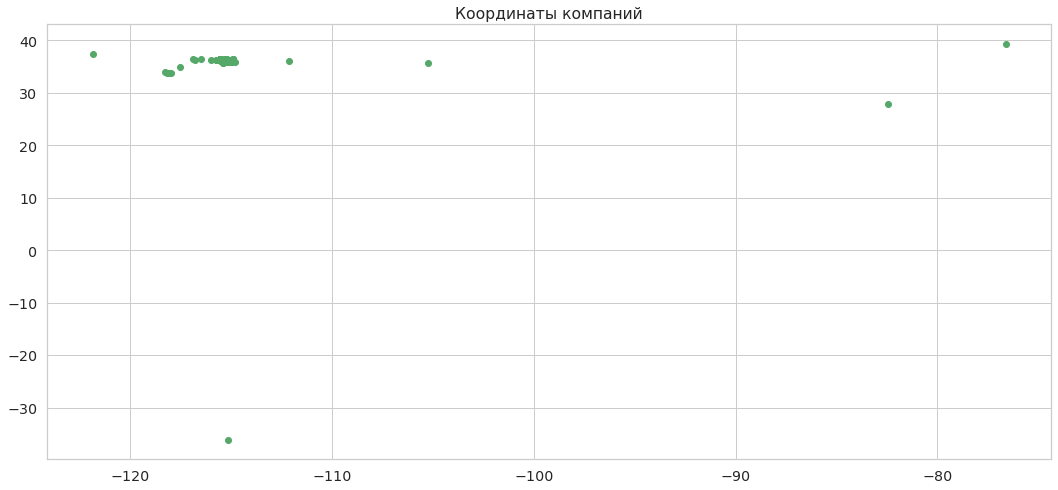

In [ ]:
data_business = data_business[(data_business['city'] == 'Las Vegas')]

plt.figure(figsize = (18, 8))
plt.title('Координаты компаний')
plt.plot(data_business['longitude'], data_business['latitude'], 'go')

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. На этом графике должны выделяться некоторые улицы. 

Text(0.5, 1.0, 'Координаты компаний, укрупнённый вариант')

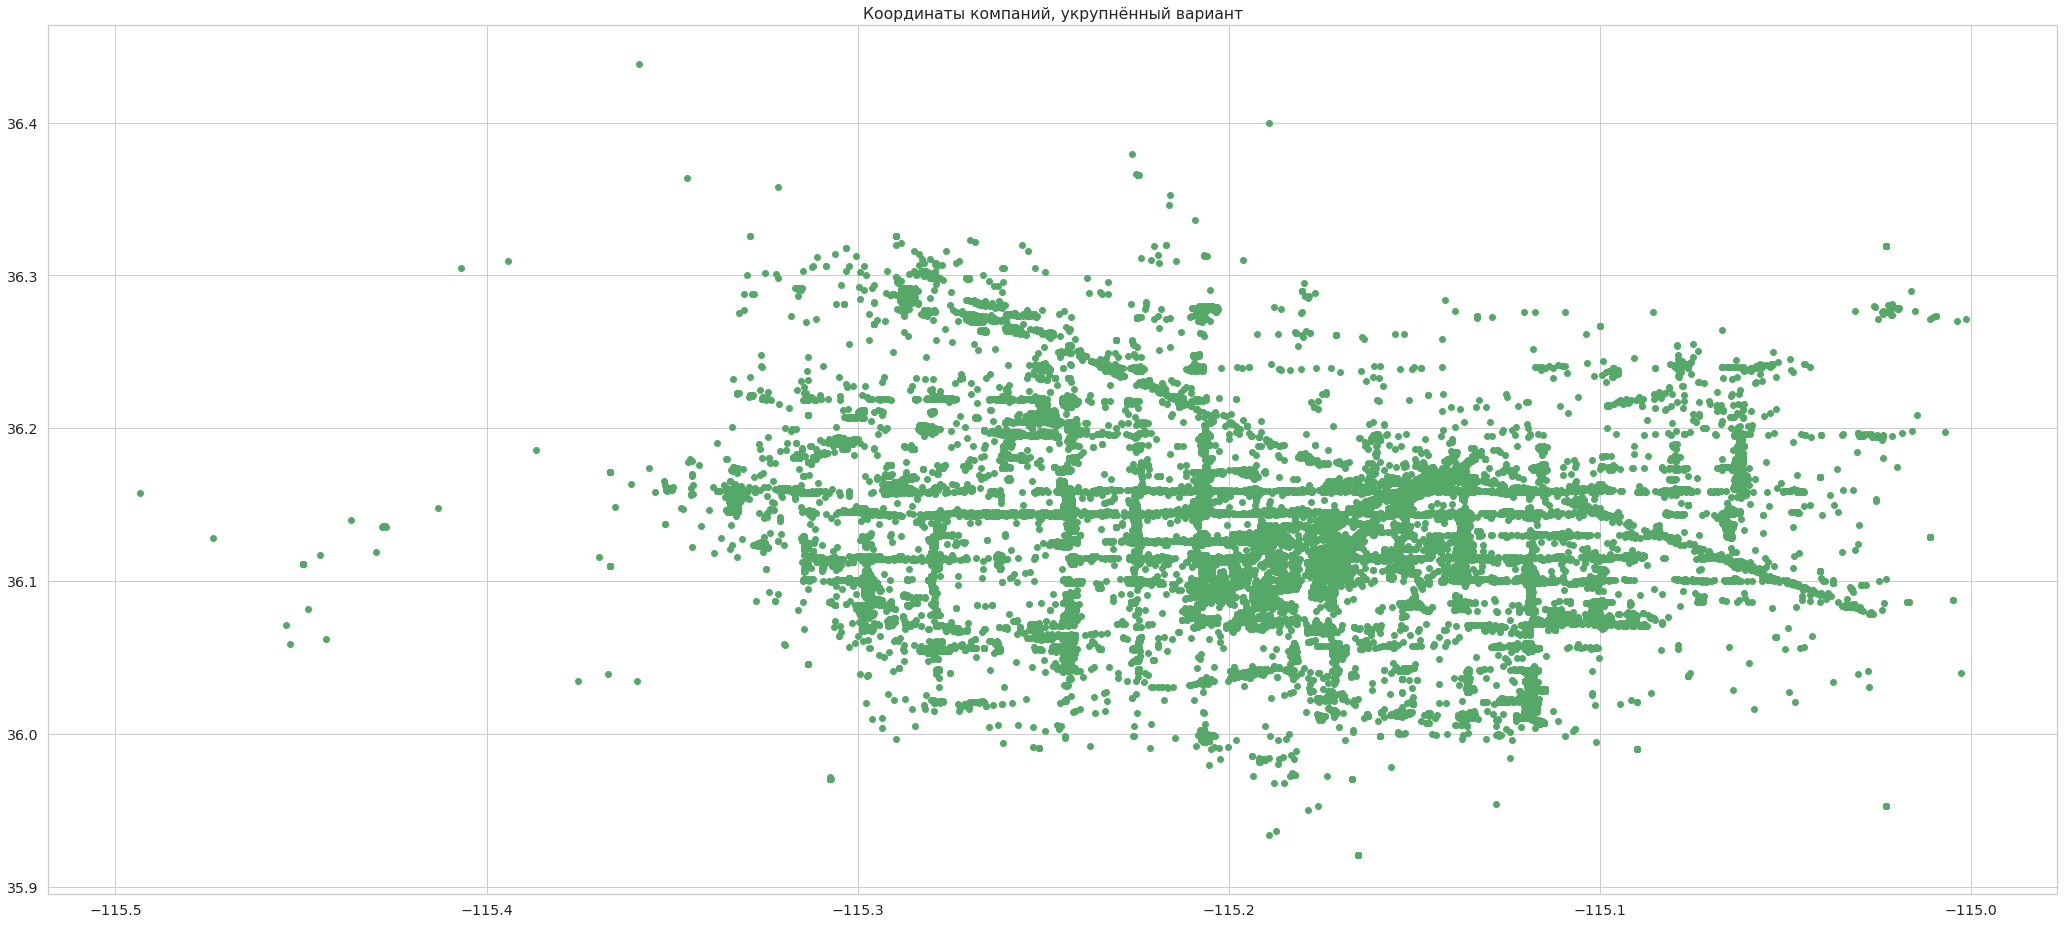

In [ ]:
data_business = data_business[(data_business['longitude'] < -115.0) & (data_business['longitude'] > -115.5)]
data_business = data_business[(data_business['latitude'] > 35.80) & (data_business['latitude'] < 36.6)]
plt.figure(figsize = (36, 16))
plt.plot(data_business['longitude'], data_business['latitude'], 'go')
plt.title('Координаты компаний, укрупнённый вариант')

Разберитесь с тем, как подгрузить интерактивную карту города в качестве фона графика. Можно пойти двумя следующими способами.
1. Изучить <a href="https://miptstats.github.io/courses/python/11_plotly.html" target="_blank">материалы</a> по библиотеке <a href="https://plotly.com/python/" target="_blank"><b>Plotly</b></a>. Возможно, потребуется также заглянуть в документацию.
1. Поразбираться с библиотекой <a href="https://github.com/python-visualization/folium" target="_blank"><b>Folium</b></a>. Посмотрите множество <a href="https://nbviewer.org/github/python-visualization/folium/tree/main/examples/" target="_blank">примеров</a>, может также помочь <a href="https://proglib.io/p/python-web-map" target="_blank">статья на русском</a>.

*Внимание!* Интерактивная карта может не сохраниться в ноутбуке, а если сохранится, то вес ноутбука может превзойти 20 Мб. Рекомендуется сохранить карту в html и отправить ее отдельным файлом в бот.

In [ ]:
map = folium.Map(location = LV_loc, zoom_start = 11)
for ind in data_business.index:
    folium.CircleMarker(location = [data_business['latitude'][ind], data_business['longitude'][ind]], radius = 0.5, color="green").add_to(map)
map.save("interactive_map.html")


Если все получилось, вы молодцы! Далее в этой задаче тоже можно делать интерактивные карты.

#### Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [ ]:
data_review = pd.read_csv('yelp_review.csv')
data_review.head(5)

,Unnamed: 0,business_id,stars
0,0,AEx2SYEUJmTxVVB18LlCwA,5
1,1,VR6GpWIda3SfvPC-lg9H3w,5
2,2,CKC0-MOWMqoeWf6s-szl8g,5
3,3,ACFtxLv8pGrrxMm6EgjreA,4
4,4,s2I_Ni76bjJNK9yG60iD-Q,4


В подгруженной таблице оценок оставьте только компании города `N`. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`. 

*Подсказка.* Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [ ]:
data_review = data_review.set_index('business_id')
data_review = data_review.loc[data_business['business_id'].to_list()]
data_review = data_review.reset_index('business_id')

Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. 

*Подсказка.* Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [ ]:
#Кладем в mean_size_data средние оценки и их количество
mean_size_data = data_review.groupby(['business_id']).agg([np.mean, np.size]).copy()
mean_size_data = mean_size_data.drop('Unnamed: 0', axis=1)

Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы. Красивые имена &mdash; то, что будет понятно простому человеку при чтении ваших результатов. Как именно их назвать &mdash; задача аналитика, то есть в данном случае ваша :)

In [ ]:
mean_size_data.columns = ['Средняя оценка', 'Количество оценок']

print(mean_size_data.head(5))

                        Средняя оценка  Количество оценок
business_id                                              
--9e1ONYQuAa-CB_Rrw7Tw        4.088904               1451
--DdmeR16TRb3LsjG0ejrQ        3.200000                  5
--WsruI0IGEoeRmkErU5Gg        4.928571                 14
--Y7NhBKzLTbNliMUX_wfg        4.875000                  8
--e8PjCNhEz32pprnPhCwQ        3.473684                 19


Соедините две полученные ранее таблицы по компаниям города `N` в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index`. В одной из них это уже должно было быть сделано.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, `stars`, `count`.

*Подсказка.* Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.

In [ ]:
#complete_data_review - DataFrame, содержащий и бизнес-информацию, и отзывы
data_business = data_business.set_index('business_id')
complete_data_review = data_business.join(mean_size_data).copy()
complete_data_review = complete_data_review.drop(['Unnamed: 0', 'city', 'state', 'postal_code', 'neighborhood', 'address', 'is_open'], axis=1)
complete_data_review.columns = ['name', 'latitude', 'longitude', 'categories', 'stars', 'count']
print(complete_data_review)

                                                    name   latitude  \
business_id                                                           
kCoE3jvEtg6UVz5SOD3GVw                      "BDJ Realty"  36.207430   
OD2hnuuTJI9uotcKycxg1A                     "Soccer Zone"  36.197484   
VBHEsoXQb2AQ76J9l8h1uQ               "Alfredo's Jewelry"  36.085051   
1Jp_hmPNUZArNqzpbm7B0g                   "Task Electric"  36.056382   
DPQnTnNw2PJj7DdENM98Cw                    "Star Nursery"  36.105196   
...                                                  ...        ...   
swjz4q8gI79Ndg4APuHEUA  "Stonegate Real Estate Services"  36.134355   
pUhU5ohYv65g8B47dTXAKA                       "Starbucks"  36.173589   
sH9WsMj8sNTTSAUWv4UEEg                    "Sprint Store"  36.055130   
9ouC6BpmjFpLfHeQnLQqng            "9 Dragons Fight Shop"  36.128780   
n9a-3YhibkMDUEgncIivHg                      "L'Occitane"  36.150022   

                         longitude  \
business_id                          


Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$.

In [ ]:
def color_change(elev):
    if(4 <= elev <= 5):
        return('green')
    elif(3 <= elev < 4):
        return('yellow')
    else:
        return('red')

map = folium.Map(location = LV_loc, zoom_start = 11)
for ind in complete_data_review.index:
    folium.CircleMarker(location = [complete_data_review['latitude'][ind], complete_data_review['longitude'][ind]], radius = 0.5, color = color_change(complete_data_review['stars'][ind]), opacity = 0.8).add_to(map)
map.save("rating_colors_inter_map.html")

Чтобы получить районы города, то есть разделить город на "клетки", округлите значения широты и долготы, подобрав оптимальный размер района. 

*Подсказка.* Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

Text(0.5, 1.0, 'Районы города')

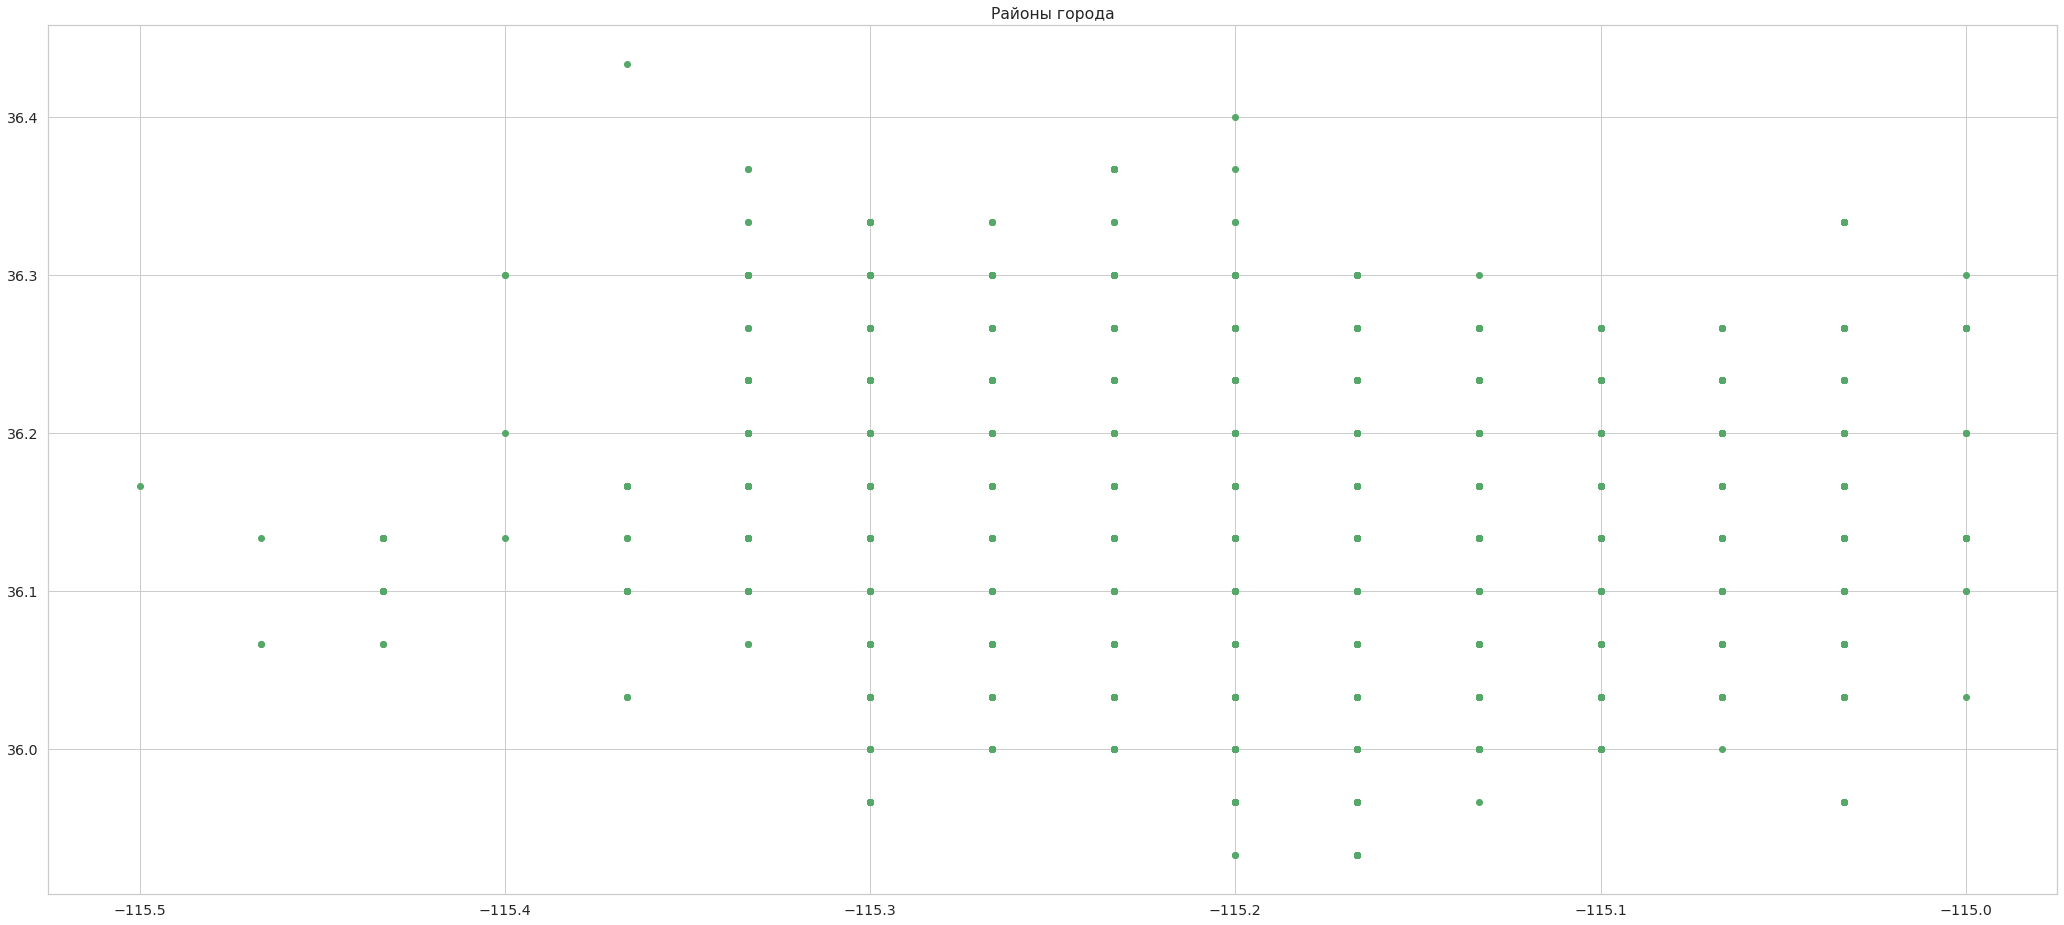

In [ ]:
# area_complete_data - DataFrame, разделенный по районам города
area_complete_data = complete_data_review.copy()
area_complete_data['latitude'] = np.round(area_complete_data['latitude']*3, decimals = 1)/3
area_complete_data['longitude'] = np.round(area_complete_data['longitude']*3, decimals = 1)/3

plt.figure(figsize = (36, 16))
plt.plot(area_complete_data['longitude'], area_complete_data['latitude'], 'go')

plt.title('Районы города')

Для получения средней оценки компании по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений &mdash; оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

<AxesSubplot:title={'center':'Тепловая карта со значениями'}, xlabel='longitude', ylabel='latitude'>

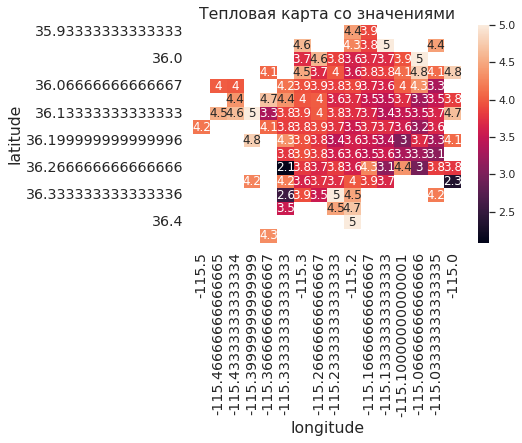

In [ ]:
table = pd.pivot_table(
    area_complete_data, 
    values = 'stars', 
    index = 'latitude',
    columns = 'longitude', 
    aggfunc = np.mean
)
plt.title('Тепловая карта со значениями')
sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(table, annot=True)

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:** 


> Если в районе существует всего несколько компаний с парой высоких отзывов, то оценка этого района может улететь вверх, не имея под этим реальных оснований

> Значения средних оценок имеют небольшой разброс, поэтому визуально карта перестает быть информативной. Необходимо установить более узкие границы значений.



Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

     latitude  longitude                               name  \
102      36.0     -115.2                   "Dynamite Grill"   
103      36.0     -115.2               "United Car Service"   
104      36.0     -115.2  "Big Frog Custom T-Shirts & More"   
105      36.0     -115.2                         "Del Taco"   
106      36.0     -115.2                        "Walgreens"   

                                            categories     stars  count  \
102      Restaurants;American (Traditional);Sushi Bars  3.225806     93   
103  Airport Shuttles;Hotels & Travel;Limos;Transpo...  3.826087     23   
104    Screen Printing/T-Shirt Printing;Local Services  4.875000     48   
105                      Restaurants;Mexican;Fast Food  1.833333     24   
106  Convenience Stores;Photography Stores & Servic...  3.136364     22   

     count_neighborh_co  
102                 115  
103                 115  
104                 115  
105                 115  
106                 115  


<AxesSubplot:title={'center':'Тепловая карта со значениями'}, xlabel='longitude', ylabel='latitude'>

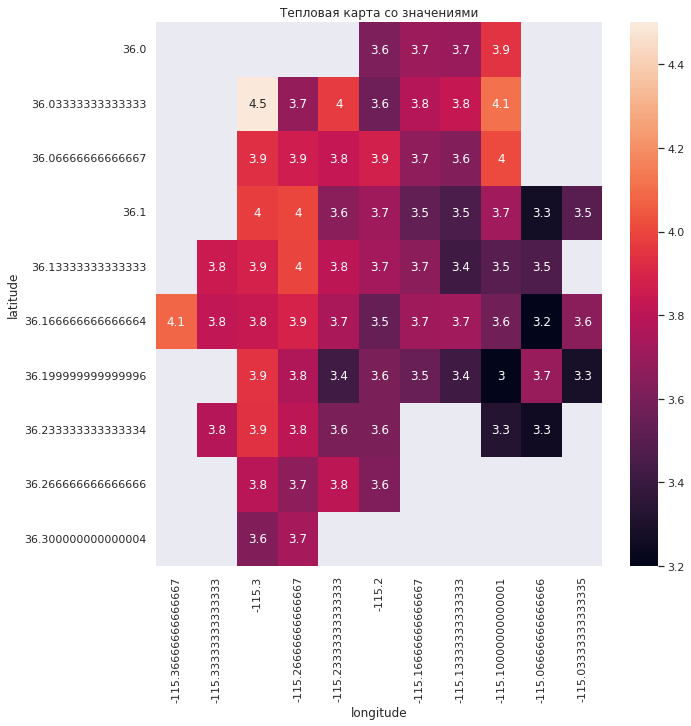

In [ ]:
#Подсчитаем количество компаний по каждому району name
new_df = area_complete_data.groupby(['latitude', 'longitude']).count()
new_df = new_df.drop(['categories', 'stars', 'count'], axis = 1)

area_complete_data = area_complete_data.set_index(['latitude', 'longitude'])
new_df.columns = ['count_neighborh_co']
area_complete_data = area_complete_data.join(new_df)
area_complete_data = area_complete_data.reset_index()
area_complete_data = area_complete_data[area_complete_data['count_neighborh_co'] >= 30]
print(area_complete_data.head(5))

#Построим heatmap
table_company_num = pd.pivot_table(
    area_complete_data, 
    values = 'stars', 
    index = 'latitude',
    columns = 'longitude', 
    aggfunc = np.mean
)
plt.title('Тепловая карта со значениями')
sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(table_company_num, annot=True, vmin = 3.2, vmax = 4.5)

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** 

> Новая карта лучше показывает общую тенденцию районов по качеству услуг: более высокий рейтинг имеют заведения на северо-западе города, когда по старой карте так можно было сказать о всей западной части. Благодаря порогу в 30 компаний исчезли выбросы на окраинах города, карта укрупнилась и стала легче для анализа. 

#### Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `restaurant`. Обратите внимание, что в анализе данных часто нет четкого формата данных. Например, данное слово может быть написано как с большой буквы, так и с маленькой; может как разделяться `;`, так и не разделяться. При возникновении недопонимания стоит посмотреть данные.

Составьте таблицу, в которой будет информация о всех ресторанах города `N`, для которых имеется не менее $5$ отзывов. Далее постройте heatmap-график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

<AxesSubplot:title={'center':'Тепловая карта со значениями'}, xlabel='longitude', ylabel='latitude'>

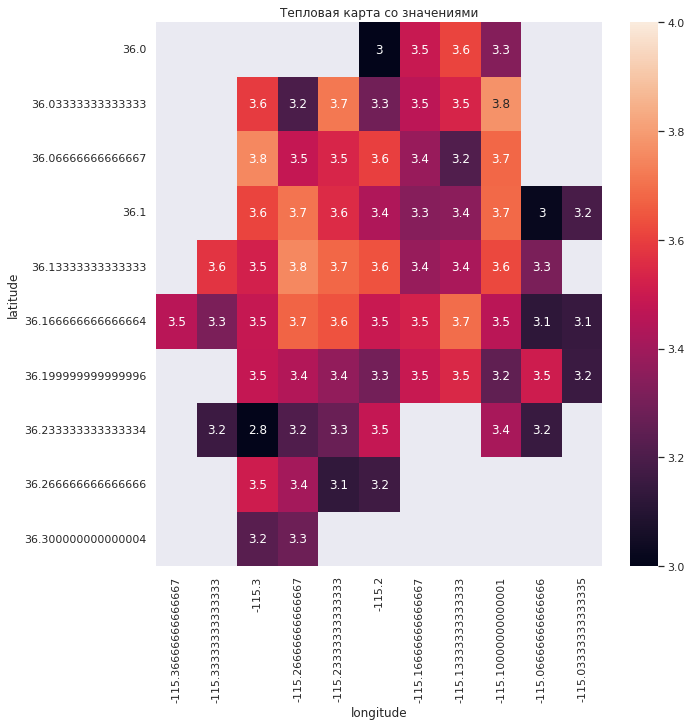

In [ ]:
reastaurant_data = area_complete_data.copy()

for i in area_complete_data.index:
  if not(('estaurant' in area_complete_data['categories'][i]) & (area_complete_data['count'][i] >= 5)):
    reastaurant_data = reastaurant_data.drop(i)

table_restaurant_company_num = pd.pivot_table(
    reastaurant_data[reastaurant_data['count_neighborh_co'] >= 10], 
    values = 'stars', 
    index = 'latitude',
    columns = 'longitude', 
    aggfunc = np.mean
)

plt.title('Тепловая карта со значениями')
sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(table_restaurant_company_num, annot=True, vmin = 3, vmax = 4)

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** Малое количество отзывов делает оценку заведения невзвешанной, такие места могут являться выбросами. Аналогично с количеством ресторанов в районе: мы не сможем взглянуть на общую тенденицю в городе. 

Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [ ]:
#Избавимся от районов и вернем ресторанам истинные координаты
reastaurant_data = complete_data_review.copy()

#FIX - медленно работает
for i in complete_data_review.index:
   if not(('estaurant' in complete_data_review['categories'][i]) & (complete_data_review['count'][i] >= 5)):
     reastaurant_data = reastaurant_data.drop(i)

reastaurant_data[reastaurant_data['count'] >= 50].sort_values(by = 'stars', ascending=False).head(10)

,name,latitude,longitude,categories,stars,count
business_id,,,,,,
iBPyahdJRP5y0t25fF2W9w,"""Lip Smacking Foodie Tours""",36.114537,-115.172678,Food Tours;Restaurants;Event Planning & Servic...,4.966480,179
Fmij544FE1iOruoxI41kew,"""Pepito Shack""",36.152477,-115.151945,Restaurants;Burgers;Food Stands;Sandwiches;Hot...,4.907692,65
qw9SyduMZ53KB6GlBQqvZQ,"""Bosa Boba Cafe""",36.125960,-115.184846,Vietnamese;Bubble Tea;Sandwiches;Food;Coffee &...,4.890909,55
k9b96JXlNewj36ddrce9Jw,"""Garden Grill""",36.166783,-115.286197,Tacos;Street Vendors;Farmers Market;Vegetarian...,4.868132,91
IhNASEZ3XnBHmuuVnWdIwA,"""Brew Tea Bar""",36.054195,-115.242443,Cafes;Tea Rooms;Food;Bubble Tea;Restaurants;De...,4.848069,1165
k5ddmLvAKKw9zSusRPM2cQ,"""Poppa Naps BBQ""",36.116549,-115.088115,Food Stands;Hot Dogs;Caterers;Restaurants;Amer...,4.836538,104
8fFTJBh0RB2EKG53ibiBKw,"""Zenaida's Cafe""",36.101741,-115.100359,Restaurants;Breakfast & Brunch;Cafes,4.833333,180
l1GJnB9TJgGgEeI4at1M0A,"""El Frescos Cocina Mexicana""",36.098527,-115.148446,Caterers;Mexican;Restaurants;Food;Event Planni...,4.816754,191
hFT3HuxVZJb1uYEsYfp-0A,"""Blaqcat Ultra Hookah Lounge""",36.159742,-115.232738,Adult Entertainment;Lounges;Hookah Bars;Restau...,4.809524,63


Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

In [ ]:
#Получим рестораны с оценкой выше 4.7
best_places = reastaurant_data[(reastaurant_data['count'] >= 50) & (reastaurant_data['stars'] >= 4.7)]
def color_change(elev):
    if(elev >= 4.807018):
        return('green')
    else:
        return('lightgreen')

map = folium.Map(location = LV_loc, zoom_start = 11)
for ind in best_places.index:
    folium.CircleMarker(location = [best_places['latitude'][ind], best_places['longitude'][ind]], radius = 8, fill_color = 'black', color = color_change(best_places['stars'][ind]), opacity = 0.8).add_to(map)
map.save("restaurants_inter_map.html")

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** 

Исходя из выбранных Василием мест, можно сказать, что он посетил разные заведения в разных частях города. Подходящие ему рестораны находятся как в центре, в самых известных казино, так и на окраинах. Он опробовал мексиканскую, азиатскую, американскую кухню, посетил чайную и хотдожную. 

**Вывод по всей задаче:**

Самый богатый рынок услуг из датасета находится в лас-Вегасы, в основной своей массе имеет невысокие рейтинги (3.3 - 3.6). Вероятно, это связано с большим количеством оставленных отзывов, которые сильно нормируют оценку. Благодаря построенным heatmap, видно, что самый *качественный сервис* в **северо-западном районе**,самый титулованный ресторан - "Lip Smacking Foodie Tours". Худше всего справляются на юге города. Вдоль самых нагруженных улиц города у большинства заведений высокие оценки. В целом, Лас-Вегас может справиться с задачей качественно обслужить клиента по самым разным запросам, но компании нужно выбирать тщательно.